# Training History Analysis

This notebook visualises training and validation loss curves for supervised learning runs.

**Purpose:** Compare loss progression across different run configurations to assess model convergence and overfitting behaviour.

**Data location:** `workspace/roadtoska/projectG/projectG_supervised_latent_radiogals/outputs/`

In [34]:
# Imports and Configuration
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Print current working directory
print(f"Current working directory: {os.getcwd()}")

# Try the relative path from your error message
relative_path = Path("../outputs")
print(f"\nRelative path: {relative_path}")
print(f"Relative path exists: {relative_path.exists()}")

Current working directory: /idia/projects/roadtoska/projectG/projectG_supervised_latent_radiogals/notebooks

Relative path: ../outputs
Relative path exists: True


In [35]:
# Data Loading Function
def load_history(run_name):
    """
    Load training history from a specific run.
    
    Parameters:
    -----------
    run_name : str
        Name of the run folder (e.g., 'closest1.0')
    
    Returns:
    --------
    dict : Dictionary containing training history arrays
        Expected keys: 'loss', 'val_loss' (may contain others)
    """
    # Construct path to history file
    history_path = relative_path / f"run_{run_name}" / "training_history.npy"
    
    # Debug: print the full path being checked
    print(f"Looking for: {history_path}")
    
    # Check if file exists
    if not history_path.exists():
        # List available runs to help debugging
        if relative_path.exists():
            available_runs = [d.name for d in relative_path.iterdir() if d.is_dir()]
            print(f"Available run directories: {available_runs}")
        raise FileNotFoundError(f"History file not found: {history_path}")
    
    # Load numpy file (allows pickle for dict objects)
    history = np.load(history_path, allow_pickle=True).item()
    
    return history

In [94]:
# Plotting Function
def plot_loss_curves(history, run_name):
    """
    Plot training and validation loss curves.
    
    Parameters:
    -----------
    history : dict
        Dictionary containing 'loss' and 'val_loss' arrays
    run_name : str
        Name of the run for the plot title
    """
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot training and validation loss
    ax.semilogy(epochs, history['train_loss'], 'b-', label='Training Loss', linewidth=2)
    ax.semilogy(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    
    # Labels and formatting
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'Training History: {run_name}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Find and mark minimum validation loss
    min_val_epoch = np.argmin(history['val_loss']) + 1
    min_val_loss = np.min(history['val_loss'])
    ax.axvline(min_val_epoch, color='gray', linestyle='--', alpha=0.5, 
               label=f'Min Val Loss (epoch {min_val_epoch})')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary Statistics:")
    print(f"Final training loss: {history['train_loss'][-1]:.4f}")
    print(f"Final validation loss: {history['val_loss'][-1]:.4f}")
    print(f"Best validation loss: {min_val_loss:.4f} (epoch {min_val_epoch})")

## Load Training History

Specify the run name to analyse and load its training history.

In [170]:
# Load Specific Run
# Configure which run to analyse
run_name = "or_closest_1.0_initial"  # Change this to analyse different runs

# Load the training history
history = load_history(run_name)

# Display available metrics and number of epochs
print(f"Run: {run_name}")
print(f"Available metrics: {list(history.keys())}")
print(f"Number of epochs: {len(history['train_loss'])}")

Looking for: ../outputs/run_or_closest_1.0_initial/training_history.npy
Run: or_closest_1.0_initial
Available metrics: ['train_loss', 'val_loss', 'lr', 'ema_decay', 'test_loss']
Number of epochs: 100


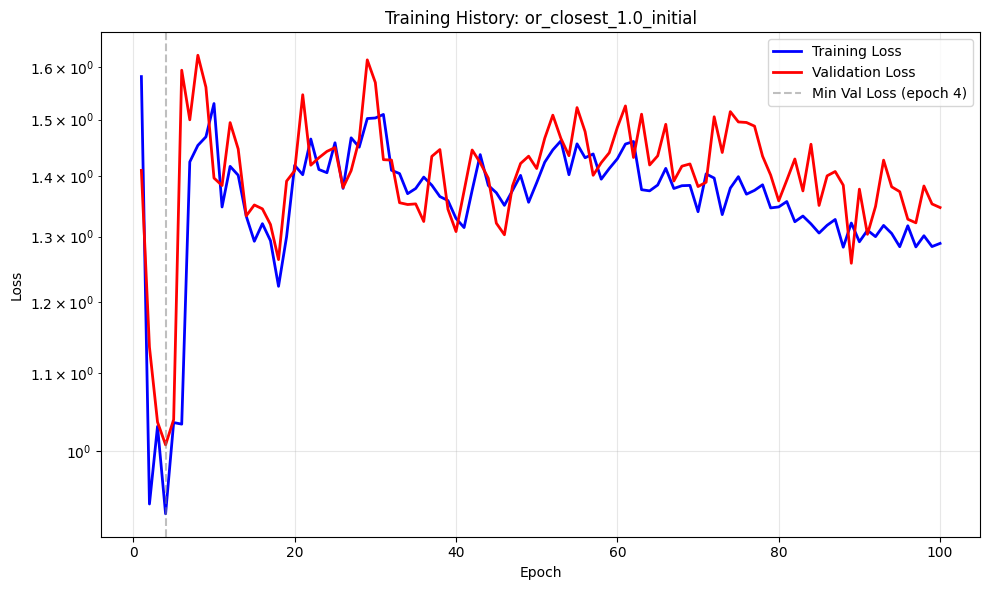


Summary Statistics:
Final training loss: 1.2893
Final validation loss: 1.3472
Best validation loss: 1.0078 (epoch 4)


In [171]:
# Generate Plot
plot_loss_curves(history, run_name)